In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def flip_operator(i):
    """
    Flip i from 0 to 1 or 1 to 0

    """
    return 0 if i == 1 else 1

In [15]:
# Matrix Construction - Periodic Boundary Conditions

def matrix_construction(h,N):

  dimension=2**N

  #spin chain with all spin-down
  z='0'*N

  # initialize hamiltonian
  H=np.zeros((dimension,dimension))

  for a in range(dimension):
    J = 1
    state_chain=bin(a)[2:]
    l=len(state_chain)
    state_chain=z[0:N-l]+state_chain

    for i in range(N):
      j=np.mod(i+1,N)

      #1. For the -S^Z_(i) S^Z_(i+1) operator
      if state_chain[i]==state_chain[j]:
        H[a,a]+=-J
      else:
        H[a,a]+=J

      #2. For the (-h)*(S+_{i} + S-_{i}) operator
      element_at_i = int(state_chain[i])
      flipped_element_at_i = flip_operator(element_at_i)
      flipped_state_chain = str(state_chain[:i]+str(flipped_element_at_i)+state_chain[i+1:])
      b = int(flipped_state_chain,2)
      H[a,b]+=-h

  return H

In [16]:
def exact_diagonalization(H):

    eig_value, eig_vector= np.linalg.eig(H) # Exact diagonalization
    eig_value = np.real(eig_value)          # Only take the real part
    eig_vector = np.real(eig_vector)

    # Sort with eigen-energy, find the ground state wave function
    idx_sorted1 = np.argsort(eig_value)
    eig_value=eig_value[idx_sorted1]
    eig_vector=eig_vector[:,idx_sorted1]

    return eig_value, eig_vector

In [17]:
h = 1 
N = 8

H = matrix_construction(h,N)

eig_value, eig_vector = exact_diagonalization(H)
eig_value_normalized = eig_value - eig_value[0]

# h_round = np.round(h,3)
# np.save(f"eig_value_at_{h_round}",eig_value_normalized) # store the normalized eigenvalues
# np.save(f"eig_vec_at_{h_round}",eig_vector) # store the eigenvector

Ground state energy 

In [18]:
print(f"Complete the diagonalization at h = {h}")
print(f"The normalized ground state energy is {eig_value[0]/N}")

Complete the diagonalization at h = 1
The normalized ground state energy is -1.2814577238707454


2nd order Renyi Entanglement Entropy 

In [19]:
def cal_renyi(psi,si,L,order):
    size1 = 2**(si)
    size2 = 2**(L-si)
    psi = psi.reshape((size1,size2))
    #reduced density matrix
    rho_r = psi@psi.T
    # print(rho_r)
    # print(np.linalg.eig(rho_r)[0])
    prob = np.linalg.eig(rho_r)[0]/np.trace(rho_r)
    renyi = (1/(1-order))*np.log(np.sum(prob**order))
    return renyi

In [20]:
ground_state_vector = eig_vector[:,0]
na_array = np.arange(0,N+1)
EE_array = np.zeros(len(na_array))

for i in range(0,N//2+1):
    na = na_array[i]
    EE_array[i] = cal_renyi(ground_state_vector ,na, N,2)

In [21]:
# Flip along the peak 
EE_array[N//2+1:] = EE_array[:N//2][::-1]

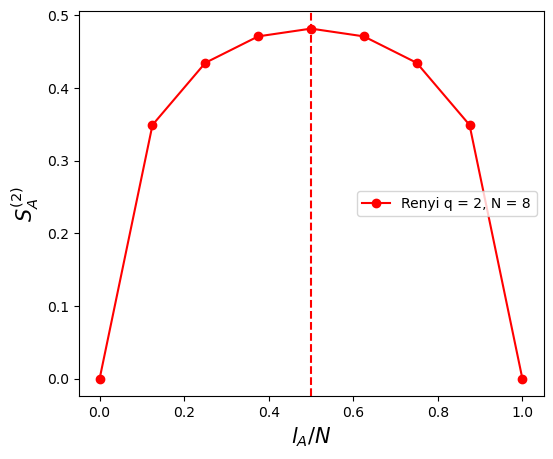

In [22]:
plt.figure(figsize=(6,5))

plt.plot(na_array/N,EE_array,"ro-",label="Renyi q = 2, N = 8")

plt.xlabel("$l_A/N$",fontsize=15)
plt.ylabel("$S^{(2)}_A$",fontsize=15)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.legend(fontsize=10)

In [23]:
print(EE_array)

[-0.          0.3491792   0.43467208  0.47107634  0.48175027  0.47107634
  0.43467208  0.3491792  -0.        ]
